Today's data

In [9]:
import numpy as np

import matplotlib.pyplot as plt

In [10]:
from sklearn.datasets import fetch_olivetti_faces
data = fetch_olivetti_faces().images

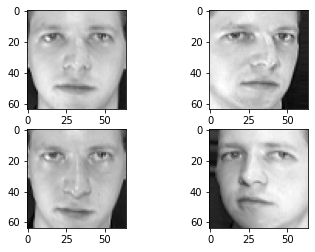

In [11]:
# this code showcases matplotlib subplots. The syntax is: plt.subplot(height, width, index_starting_from_1)
plt.subplot(2,2,1)
plt.imshow(data[0],cmap='gray')
plt.subplot(2,2,2)
plt.imshow(data[1],cmap='gray')
plt.subplot(2,2,3)
plt.imshow(data[2],cmap='gray')
plt.subplot(2,2,4)
plt.imshow(data[3],cmap='gray')

Face reconstruction problem

In [12]:
data.shape

(400, 64, 64)

In [13]:
# select left half of each face as X, right half as Y
X = data[:,:, :32]
y = data[:,:, 32:]

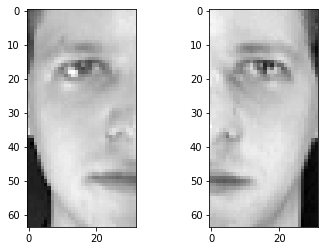

In [14]:
# If you did everything right, you're gonna see left half-image and right half-image drawn separately in natural order
plt.subplot(1,2,1)
plt.imshow(X[0],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(y[0],cmap='gray')

assert X.shape == y.shape == (len(data), 64, 32), "Please slice exactly the left half-face to X and right half-face to Y"

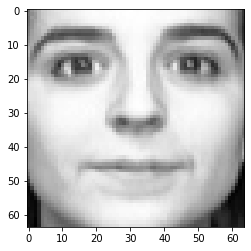

In [15]:
def glue(left_half,right_half):
    # merge photos back together
    left_half = left_half.reshape([-1, 64, 32])
    right_half = right_half.reshape([-1, 64, 32])
    return np.concatenate([left_half, right_half], axis=-1)


# if you did everything right, you're gonna see a valid face
plt.imshow(glue(X, y)[99], cmap='gray')

Linear regression

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X.reshape([len(X), -1]),
                                                    y.reshape([len(y), -1]),
                                                    test_size=0.05, random_state=42)

print(X_test.shape)

(20, 2048)


In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [18]:
from sklearn.metrics import mean_squared_error

print("Train MSE:", mean_squared_error(Y_train, model.predict(X_train)))
print("Test MSE:", mean_squared_error(Y_test, model.predict(X_test)))

Train MSE: 3.206661e-12
Test MSE: 0.010283969


Why train error is much smaller than test?

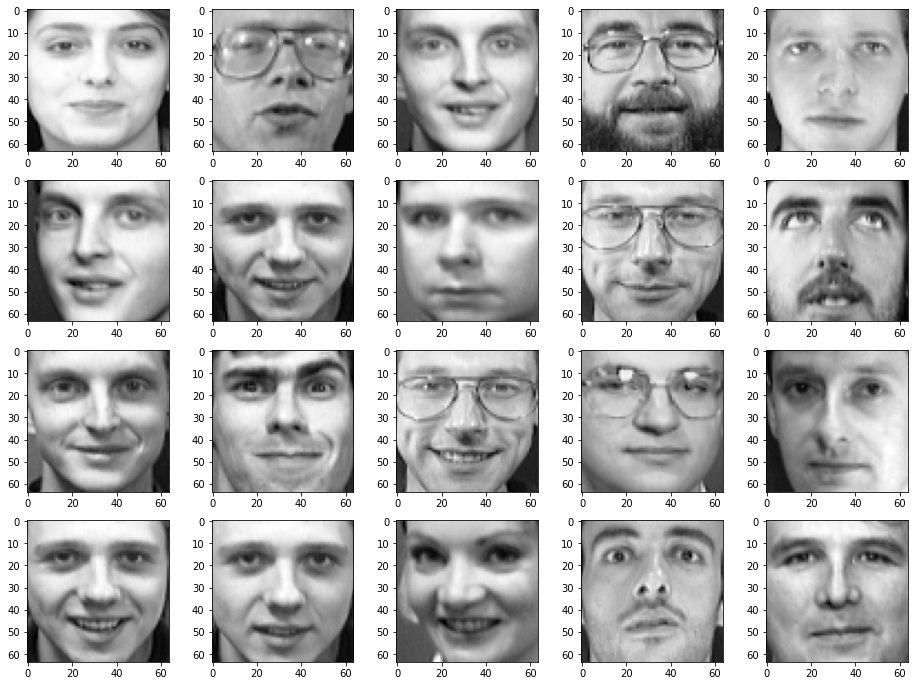

In [19]:
# Train predictions
pics = glue(X_train,model.predict(X_train)) # reconstruct and glue together X and predicted Y for the train dataset

plt.figure(figsize=[16, 12])
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(pics[i], cmap='gray')

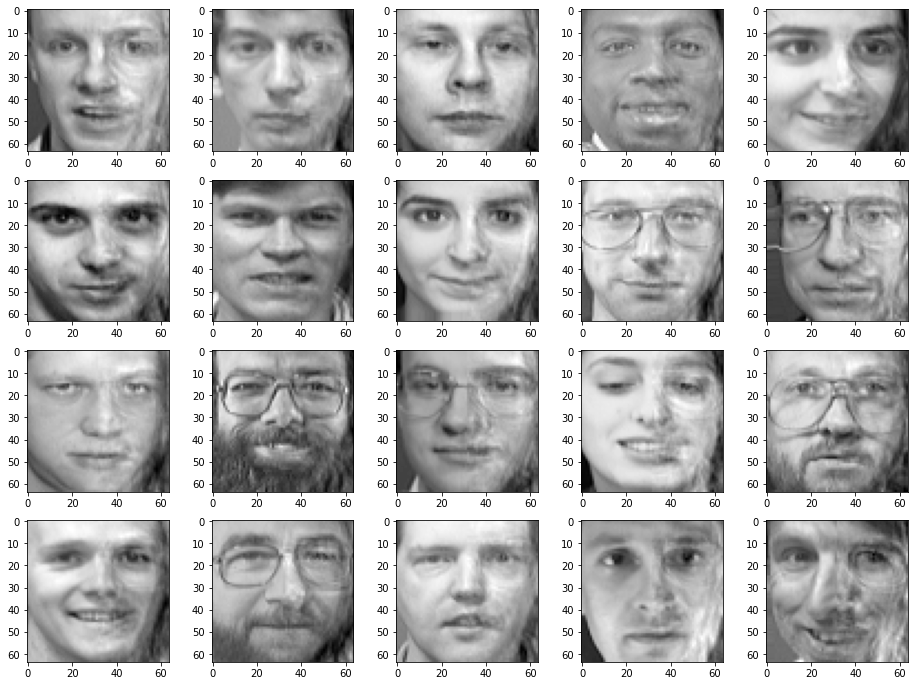

In [20]:
# Test predictions
pics = glue(X_test, model.predict(X_test)) # reconstruct and glue together X and predicted Y for the test dataset

plt.figure(figsize=[16, 12])
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(pics[i], cmap='gray')

Ridge regression

In [21]:
 from sklearn.linear_model import Ridge

ridge = Ridge()

ridge.fit(X_train, Y_train)
#<YOUR CODE: fit the model on training set>

Ridge()

In [22]:
print("Train MSE:", mean_squared_error(Y_train, ridge.predict(X_train)))
print("Test MSE:", mean_squared_error(Y_test, ridge.predict(X_test)))

Train MSE: 0.0008228952
Test MSE: 0.0075132423


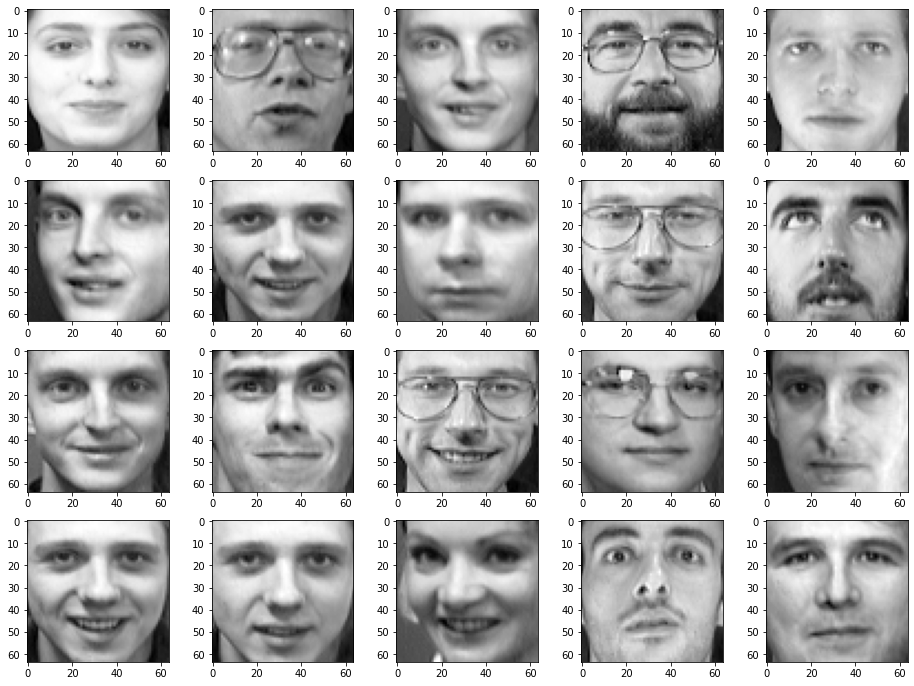

In [23]:
# Test predictions
pics = glue(X_train, ridge.predict(X_train)) # reconstruct and glue together X and predicted Y for the test dataset

plt.figure(figsize=[16, 12])
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(pics[i], cmap='gray')


Finding the best alpha (grid search)

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
#pip install --upgrade matplotlib

Fitting 5 folds for each of 13 candidates, totalling 65 fits


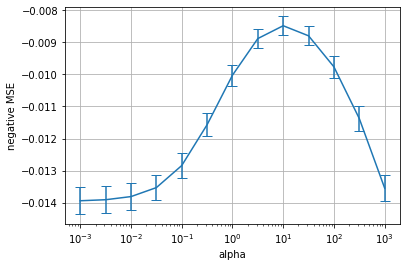

In [26]:
parameter_dict = {
    "alpha" : np.logspace(-3, 3, 13, base=10)
}

gscv = GridSearchCV(
    estimator=Ridge(), # our model to optimize
    param_grid=parameter_dict, # grid of parameter values
    scoring='neg_mean_squared_error', # metric - it needs to be a score, so
                                      # we take the negative MSE
    cv=5, verbose=2, n_jobs=-1
)
gscv.fit(X_train, Y_train)

plt.errorbar(gscv.param_grid['alpha'],
             gscv.cv_results_['mean_test_score'],
             gscv.cv_results_['std_test_score'] / gscv.cv**0.5,
             capsize=5)
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("negative MSE")
plt.grid()

In [27]:
gscv.best_estimator_

Ridge(alpha=10.0)

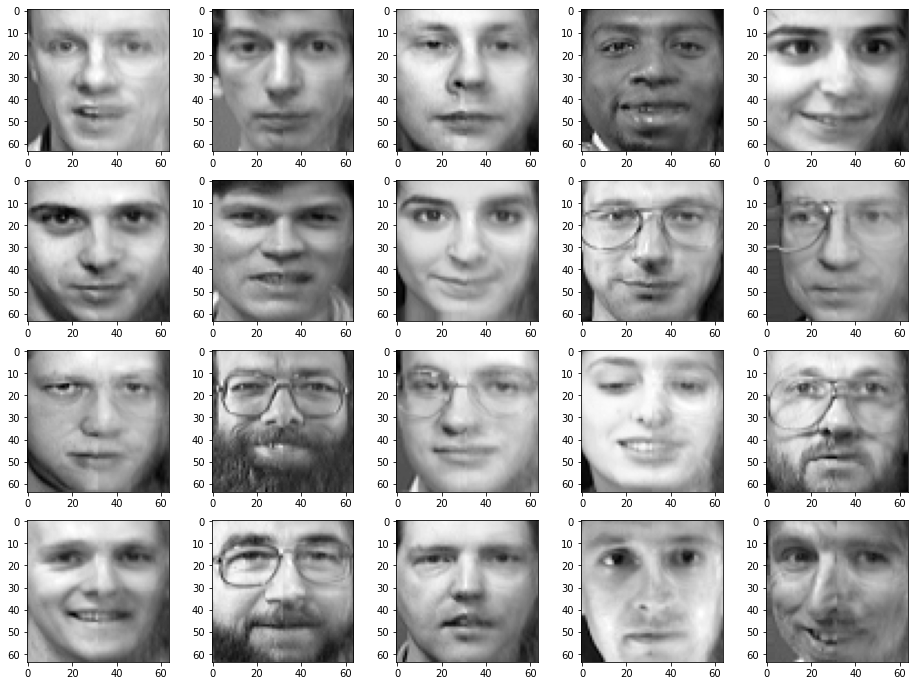

In [28]:
# Test predictions
pics = glue(X_test, gscv.best_estimator_.predict(X_test))
plt.figure(figsize=[16, 12])
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(pics[i], cmap='gray')

Fitting 5 folds for each of 13 candidates, totalling 65 fits


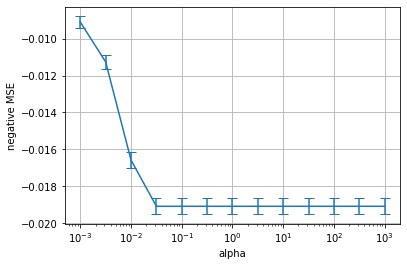

In [29]:
from sklearn.linear_model import Lasso, ElasticNet

# Use the code above to do GridSearch for Lasso and/or ElasticNet
# models. Note that Lasso and ElasticNet are *much*
# slower to fit, compared to Ridge (especially for small alpha).
parameter_dict = {
    "alpha" : np.logspace(-3, 3, 13, base=10)
}

gscv = GridSearchCV(
    estimator=Lasso(), # our model to optimize
    param_grid=parameter_dict, # grid of parameter values
    scoring='neg_mean_squared_error', # metric - it needs to be a score, so
                                      # we take the negative MSE
    cv=5, verbose=2, n_jobs=-1
)
gscv.fit(X_train, Y_train)

plt.errorbar(gscv.param_grid['alpha'],
             gscv.cv_results_['mean_test_score'],
             gscv.cv_results_['std_test_score'] / gscv.cv**0.5,
             capsize=5)
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("negative MSE")
plt.grid()

In [30]:
gscv.best_estimator_

Lasso(alpha=0.001)

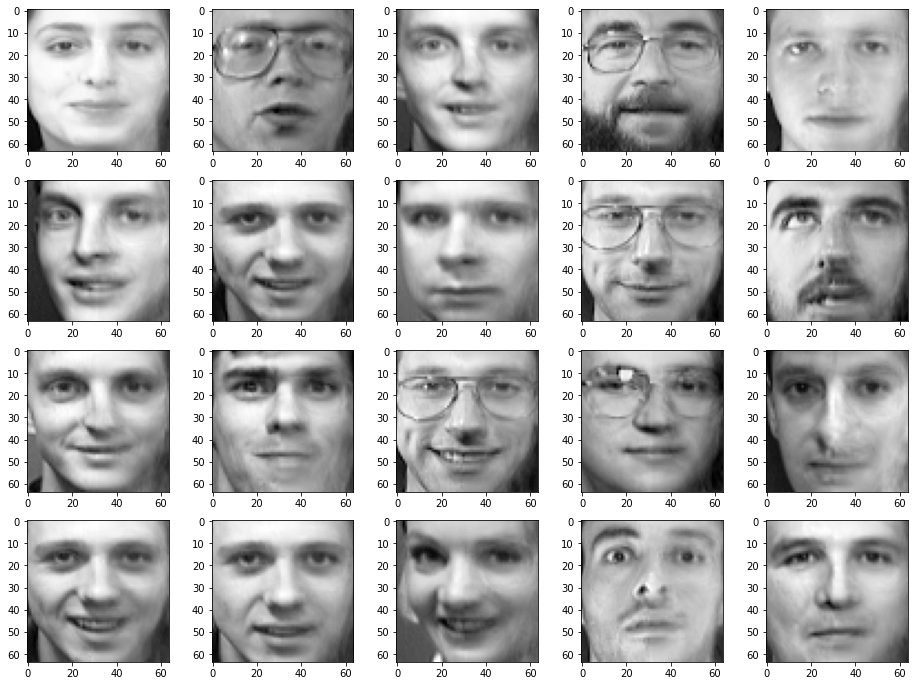

In [31]:
# Train predictions
pics = glue(X_train, gscv.best_estimator_.predict(X_train)) # reconstruct and glue together X and predicted Y for the train dataset

plt.figure(figsize=[16, 12])
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(pics[i], cmap='gray')

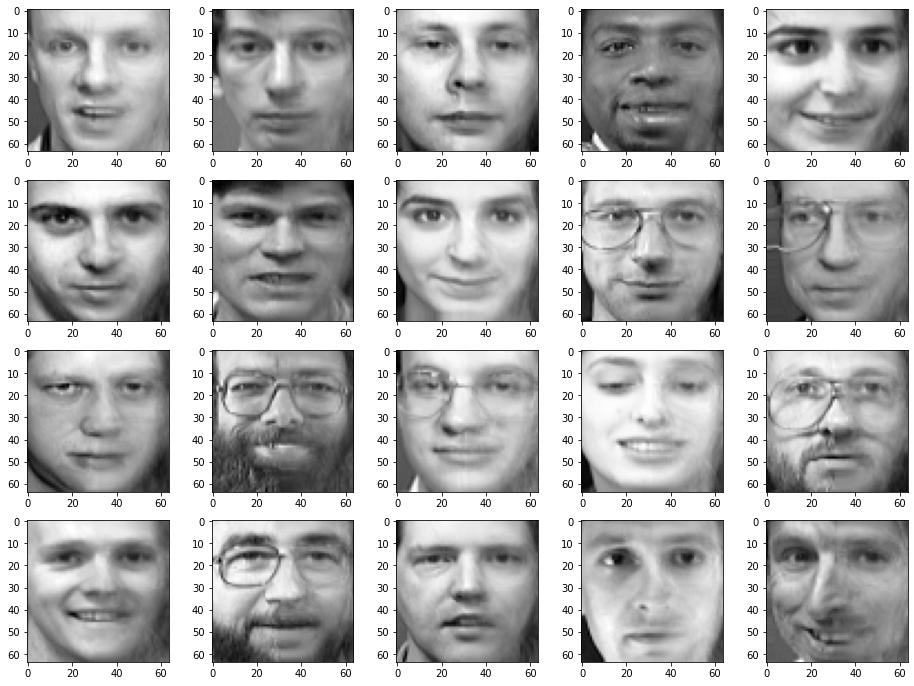

In [32]:
# Test predictions
pics = glue(X_test, gscv.best_estimator_.predict(X_test)) # reconstruct and glue together X and predicted Y for the test dataset

plt.figure(figsize=[16, 12])
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(pics[i], cmap='gray')

Add transformers and make a pipeline


some_transformer = sklearn.some_module.SomeTransformerClass(some_parameters) # create the transformer object

some_transformer.fit(X, y) # learn how to transform the data (e.g.
                           # for StandardScaler, calculate mean and std of columns in X)

some_transformer.transform(X) # transform the features

In [33]:
#make a new Ridge model using a pipeline with StandardScaler() and  Ridge regression
#fit the model and print 'Train MSE' and 'Test MSE'
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(X_train))


StandardScaler()


In [34]:
x_train_tr = scaler.transform(X_train)
x_test_tr = scaler.transform(X_test)

In [35]:
print(x_train_tr.mean(axis=0), x_test_tr.mean(axis=0))


[ 1.9214655e-08  1.1293512e-08 -8.7838421e-09 ... -1.2548347e-09
  2.8233780e-09  6.2741732e-09] [-0.15819722 -0.19521268 -0.03817471 ... -0.09930244 -0.08726726
 -0.11093844]


In [36]:
print(x_train_tr.std(axis=0), x_test_tr.std(axis=0))


[1.         1.0000001  1.0000001  ... 0.99999964 0.9999999  1.0000001 ] [1.0802366  1.0035278  0.96350235 ... 1.0269032  1.0603181  1.0664052 ]


In [37]:
from sklearn.pipeline import make_pipeline
model1=make_pipeline(StandardScaler(),Ridge())
model1.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [38]:
print("Train MSE:", mean_squared_error(Y_train, model1.predict(X_train)))
print("Test MSE:", mean_squared_error(Y_test, model1.predict(X_test)))

Train MSE: 2.6526413e-06
Test MSE: 0.010142388


In [39]:
parameter_dict = {
    "ridge__alpha" : np.logspace(-1, 7, 9, base=10) # note the 'ridge__' prefix
                                                    # that tells to which step
                                                    # of the pipeline this
                                                    # parameter belongs
}

gscv = GridSearchCV(
    estimator=model,
    param_grid=parameter_dict,
    scoring='neg_mean_squared_error',
    cv=5, verbose=2, n_jobs=-1
)
gscv.fit(X_train, Y_train)


plt.errorbar(gscv.param_grid['ridge__alpha'],
             gscv.cv_results_['mean_test_score'],
             gscv.cv_results_['std_test_score'] / gscv.cv**0.5,
             capsize=5)
#plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("negative MSE")
plt.grid()

Fitting 5 folds for each of 9 candidates, totalling 45 fits


ValueError: Invalid parameter 'ridge' for estimator LinearRegression(). Valid parameters are: ['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'].

Outliers impact on regression

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn import linear_model, datasets


n_samples = 1000
n_outliers = 50


X, y, coef = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=True, random_state=0)

# Add outlier data
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

# Fit line using all data
lr = linear_model.LinearRegression()
lr.fit(X, y)

# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor()
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Predict data of estimated models
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_ransac = ransac.predict(line_X)

# Compare estimated coefficients
print("Estimated coefficients (true, linear regression, RANSAC):")
print(coef, lr.coef_, ransac.estimator_.coef_)

In [ ]:
plt.figure(figsize=(12,6))
lw = 2
plt.scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.',
            label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='gold', marker='.',
            label='Outliers')
plt.plot(line_X, line_y, color='navy', linewidth=lw, label='Linear regressor')
plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=lw,
         label='RANSAC regressor')
plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()

Bonus part

Try using sklearn.linear_model.SGDRegressor with huber loss in the code above instead of LinearRegression. Is it better in this case? Try varying its epsilon parameter.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn import linear_model, datasets


n_samples = 1000
n_outliers = 50


X, y, coef = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=True, random_state=0)

# Add outlier data
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

# Fit line using all data
lr = linear_model.LinearRegression()
lr.fit(X, y)

# Robustly fit linear model with Huber regression
huber = linear_model.HuberRegressor(epsilon=2)
huber.fit(X, y)
 
# Predict data of estimated models
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_huber = huber.predict(line_X)

In [ ]:
plt.figure(figsize=(12,6))
lw = 2
plt.scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.',
            label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='gold', marker='.',
            label='Outliers')
plt.plot(line_X, line_y, color='navy', linewidth=lw, label='Linear regressor')
plt.plot(line_X, line_y_huber, color='cornflowerblue', linewidth=lw,
         label='Huber regressor')
plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()